# Analyzing Crime in LA

## 🌇🚔 Background

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs!

However, as with any highely populated city, it isn't always glamarous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing their crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

You are free to use any methodologies that you like in order to produce your insights. 

# The Data

They have provided you with a single dataset to use. A summary and preview is provided below.

The data is publicly available [here](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8).

## 👮‍♀️ crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24 hour military time. |
| `'AREA'` | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Rpt Dist No'` | A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74ab |
| `'Crm Cd'` | Crime code for the offence committed. |
| `'Crm Cd Desc'` | Definition of the crime. |
| `'Vict Age'` | Victim Age (years) |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Premis Cd'` | Code for the type of structure, vehicle, or location where the crime took place. |
| `'Premis Desc'` | Definition of the `'Premis Cd'`. |
| `'Weapon Used Cd'` | The type of weapon used in the crime. |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'Crm Cd 1'` | Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. |
| `'Crm Cd 2'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 3'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 4'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'LOCATION'` | Street address of the crime. |
| `'Cross Street'` | Cross Street of rounded Address |
| `'LAT'` | Latitude of the crime location. |
| `'LON'` | Longtitude of the crime location. |

## 💪 The Challenge

* Use your skills to produce insights about crimes in Los Angeles.
* Examples could include examining how crime varies by area, crime type, victim age, time of day, and victim descent.
* You could build machine learning models to predict criminal activities, such as when a crime may occur, what type of crime, or where, based on features in the dataset.
* You may also wish to visualize the distribution of crimes on a map.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
crimes = pd.read_csv("data/crimes.csv")
print(crimes.shape)

(400146, 25)


In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400146 entries, 0 to 400145
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           400146 non-null  int64  
 1   Date Rptd       400146 non-null  object 
 2   DATE OCC        400146 non-null  object 
 3   TIME OCC        400146 non-null  int64  
 4   AREA            400146 non-null  int64  
 5   AREA NAME       400146 non-null  object 
 6   Rpt Dist No     400146 non-null  int64  
 7   Crm Cd          400146 non-null  int64  
 8   Crm Cd Desc     400146 non-null  object 
 9   Vict Age        400146 non-null  int64  
 10  Vict Sex        346271 non-null  object 
 11  Vict Descent    346268 non-null  object 
 12  Premis Cd       400140 non-null  float64
 13  Premis Desc     399910 non-null  object 
 14  Weapon Used Cd  136027 non-null  float64
 15  Weapon Desc     136027 non-null  object 
 16  Status Desc     400146 non-null  object 
 17  Crm Cd 1  

In [4]:
nulls = crimes.isnull().sum().sort_values(ascending = False).reset_index()
nulls.columns = ['index', 'null_count']
nulls[nulls['null_count'] > 0]

,index,null_count
0,Crm Cd 4,400146
1,Crm Cd 3,399348
2,Crm Cd 2,372025
3,Cross Street,335564
4,Weapon Used Cd,264119
5,Weapon Desc,264119
6,Vict Descent,53878
7,Vict Sex,53875
8,Premis Desc,236
9,Premis Cd,6


# Preprocessing

In [5]:
# Fixing Vict Gender column
mapping_sex = {
    'M': 'male',
    'F': 'female',
    'X': 'unknown'
}

mapping_descent = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

In [139]:
df = crimes.copy()

In [140]:
# Fixing Vict Descent
df['Vict Descent'] = df['Vict Descent'].apply(lambda x: x if x != '-' else np.nan)

In [141]:
# Fixing Vict Age column
df['Vict Age'] = df['Vict Age'].apply(lambda x: x if x > 0 else np.nan)
df['Vict Age'] = df['Vict Age'].apply(lambda x: x if x < 100 else np.nan)

bins = np.arange(0, 100, 10)
df['Vict Agebin'] = pd.cut(df['Vict Age'], bins)
df['Vict Agebin'] = df['Vict Agebin'].astype(str)
df['Vict Agebin'] = df['Vict Agebin'].str.replace("]",")")

/var/folders/qq/_pxy1w012md00pykw2bn68bw0000gn/T/ipykernel_2746/3790776930.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Vict Agebin'] = df['Vict Agebin'].str.replace("]",")")


In [142]:
# Fixing Vict Sex column
df['Vict Sex'] = df['Vict Sex'].map(mapping_sex)

In [143]:
# Remove the time component
df['DATE OCC'] = df['DATE OCC'].str.split(' ').str[0]

# Convert to datetime
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format = "%Y-%m-%d")
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format = "%m/%d/%Y")

df['Month'] = df['Date Rptd'].dt.month
df['Year'] = df['Date Rptd'].dt.year

# Extract year, month, date
df['Date Rptd'] = df['Date Rptd'].dt.date
df['DATE OCC'] = df['DATE OCC'].dt.date

In [144]:
# Fix time column

# Add leading zero if length is less than 4
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

# Extract hour
df['Hour'] = pd.to_datetime(df['TIME OCC'], format = '%H%M').dt.hour

In [145]:
# Remove the zero-coordate locations
df['LAT'] = df['LAT'].apply(lambda x: x if x > 0 else np.nan)
df['LON'] = df['LON'].apply(lambda x: x if x < 0 else np.nan)

# Exploratory Data Analysis

In [146]:
major_crimes = [
    'CRIMINAL HOMICIDE', 
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 
    'LYNCHING', 
    'KIDNAPPING', 
    'MANSLAUGHTER, NEGLIGENT'
]

#sorted(df['Crm Cd Desc'].unique())

In [147]:
mapping = {
    'AREA NAME': 'Area',
    'Vict Agebin': 'Victim Age',
    'Vict Sex': 'Victim Sex',
    'Vict Descent': 'Victim Descent',
    'Crm Cd Desc': 'Crime'
}

In [174]:
# define key variables
top = 10
top_crimes = df['Crm Cd Desc'].value_counts().reset_index().sort_values(by = 'Crm Cd Desc', ascending = False)['index'].values[:top]

In [175]:
top_dist_limit = 10
top_districts = df['AREA NAME'].value_counts().sort_values(ascending = False).reset_index()['index'].values[:top_dist_limit]

# Q1. What are the most common crimes?

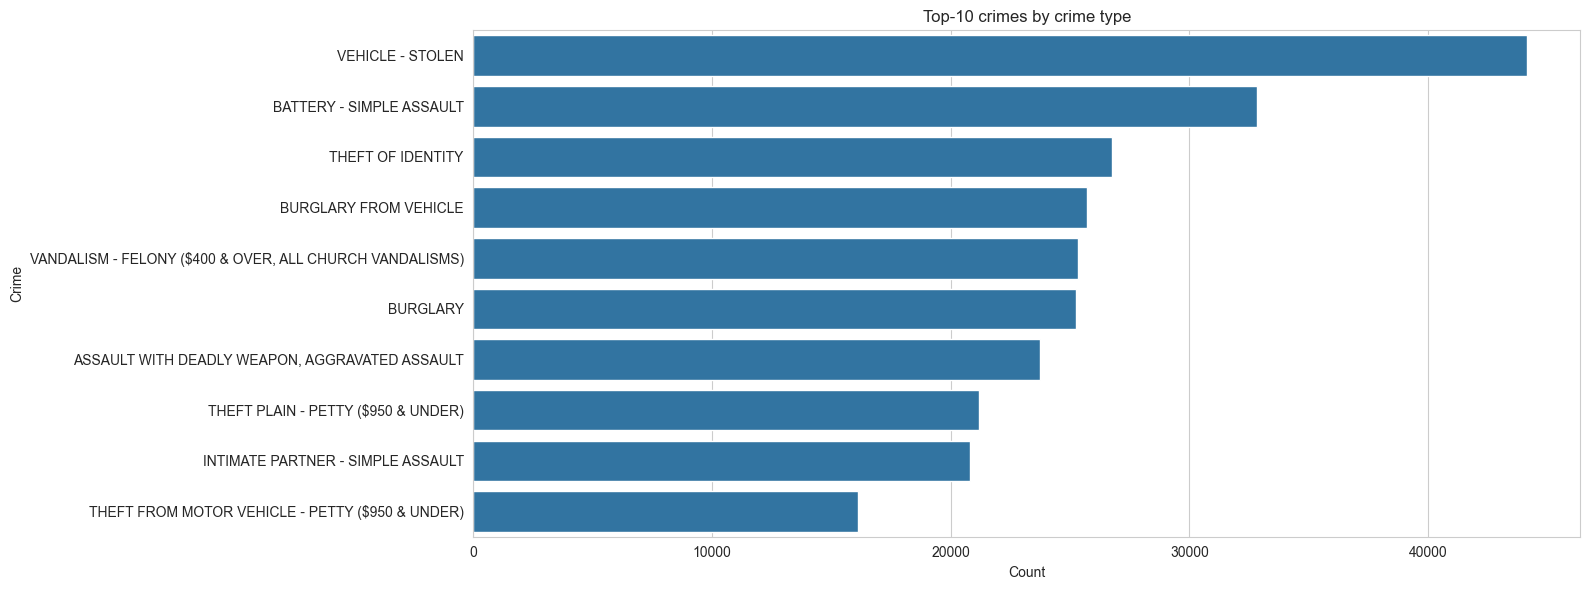

In [176]:
plt.figure(figsize = (16, 6))
tmp = df['Crm Cd Desc'].value_counts().reset_index()
tmp.columns = ['Crime', 'Count']
sns.barplot(data = tmp.head(top), x = 'Count', y = 'Crime')
plt.title(f"Top-{top} crimes by crime type")
plt.tight_layout()

## Among Most-Common Crimes

### Q1.1 How does Gender vary?

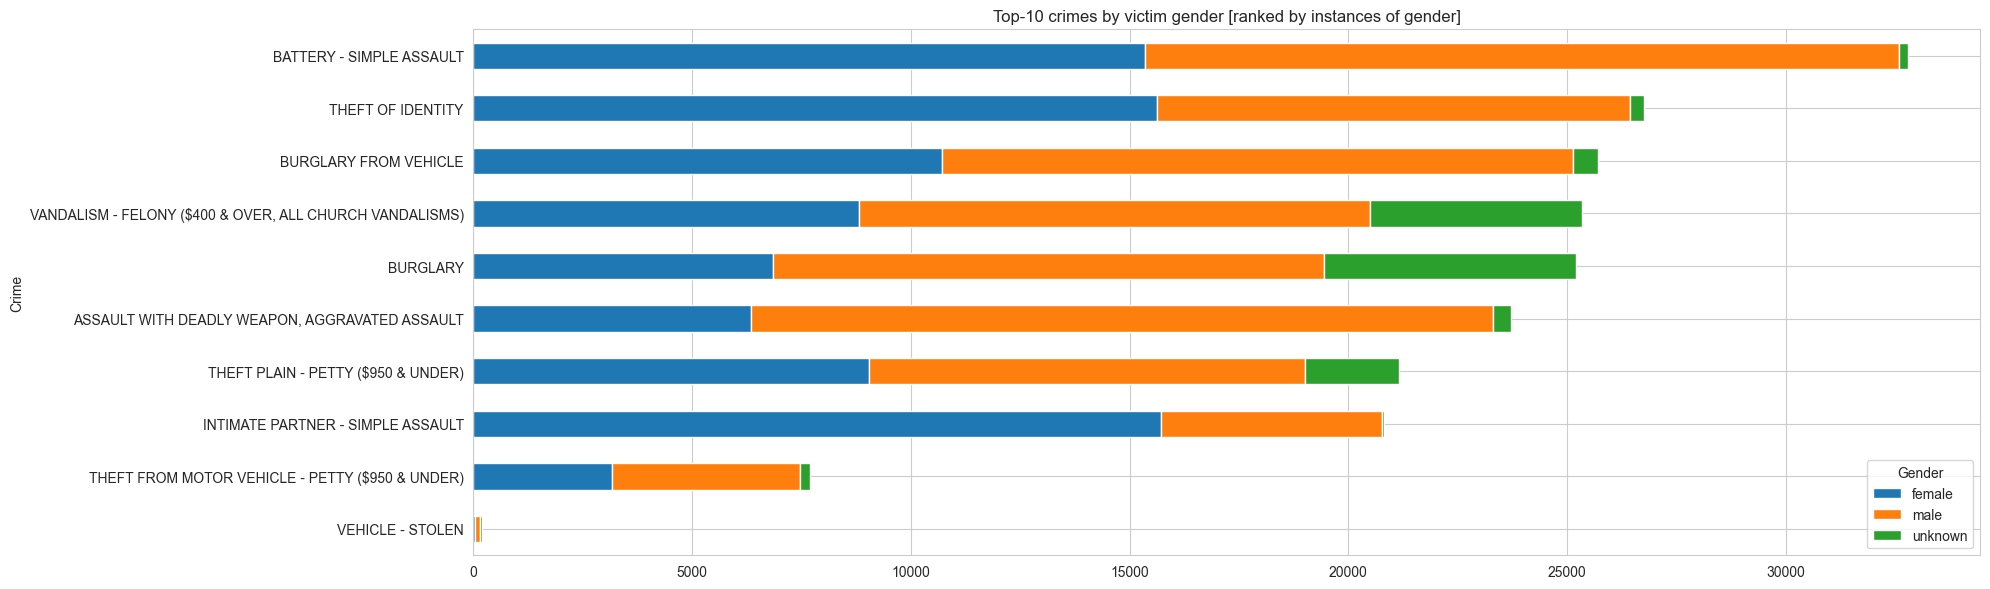

In [177]:
tmp = df[df['Crm Cd Desc'].isin(top_crimes)]
tmp = tmp.groupby(['Crm Cd Desc','Vict Sex'])['DR_NO'].count().reset_index()
tmp.columns = ['Crime', 'Gender', 'Count']
tmp = tmp.pivot(index = 'Crime', columns = 'Gender', values = 'Count')
tmp['Total'] = tmp.sum(axis = 1)
tmp = tmp.sort_values(by = 'Total')
tmp = tmp.drop("Total", axis = 1)

tmp.plot(kind = 'barh', stacked = True, figsize = (20, 6))
plt.title(f"Top-{top} crimes by victim gender [ranked by instances of gender]")
plt.tight_layout()

### Q1.2 How does location vary?

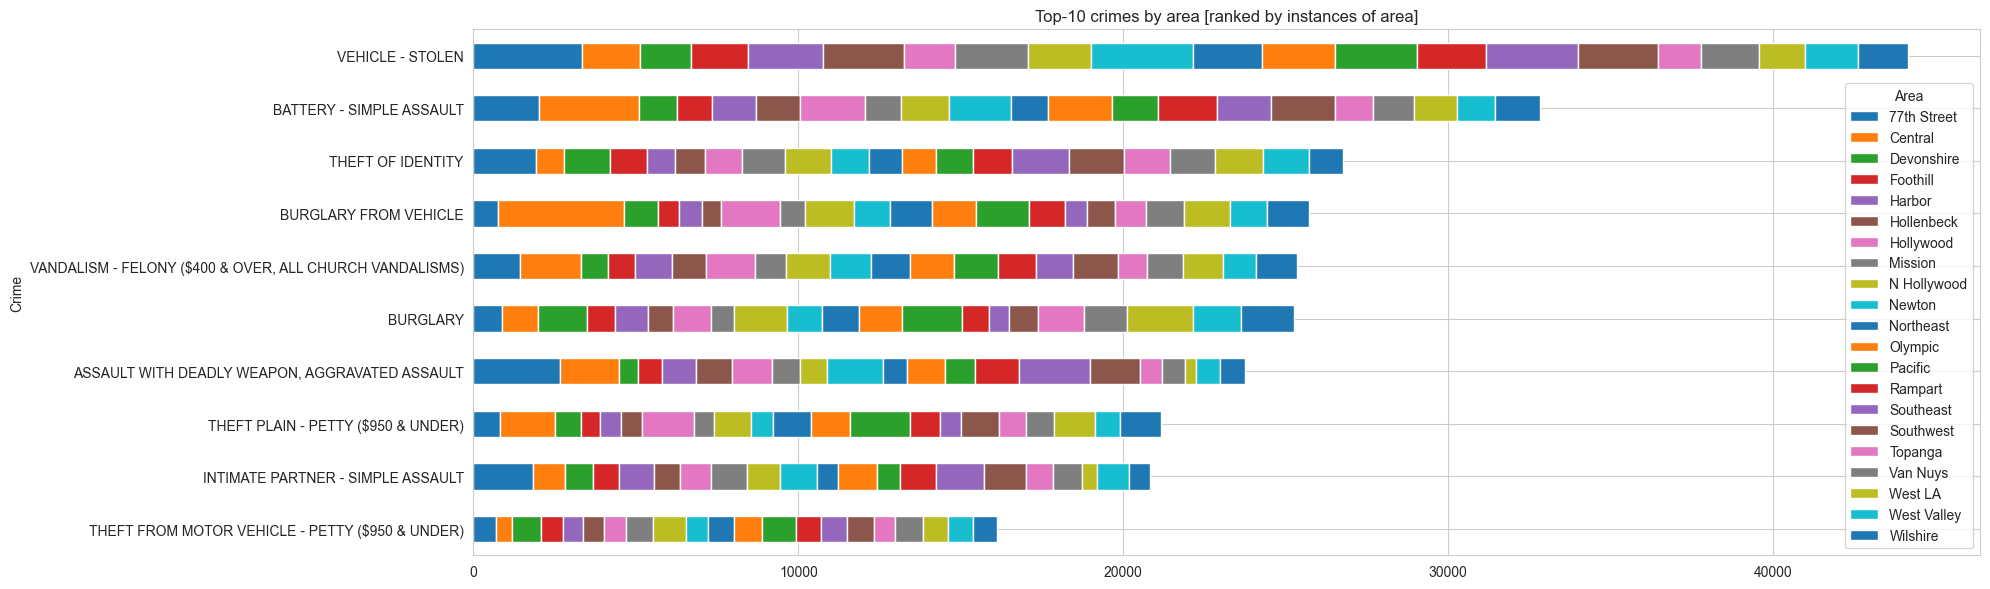

In [178]:
tmp = df[df['Crm Cd Desc'].isin(top_crimes)]
tmp = tmp.groupby(['Crm Cd Desc','AREA NAME'])['DR_NO'].count().reset_index()
tmp.columns = ['Crime', 'Area', 'Count']
tmp = tmp.pivot(index = 'Crime', columns = 'Area', values = 'Count')
tmp['Total'] = tmp.sum(axis = 1)
tmp = tmp.sort_values(by = 'Total')
tmp = tmp.drop("Total", axis = 1)

tmp.plot(kind = 'barh', stacked = True, figsize = (20, 6))
plt.title(f"Top-{top} crimes by area [ranked by instances of area]")
plt.tight_layout()

### Q1.3 How does victim descent vary?

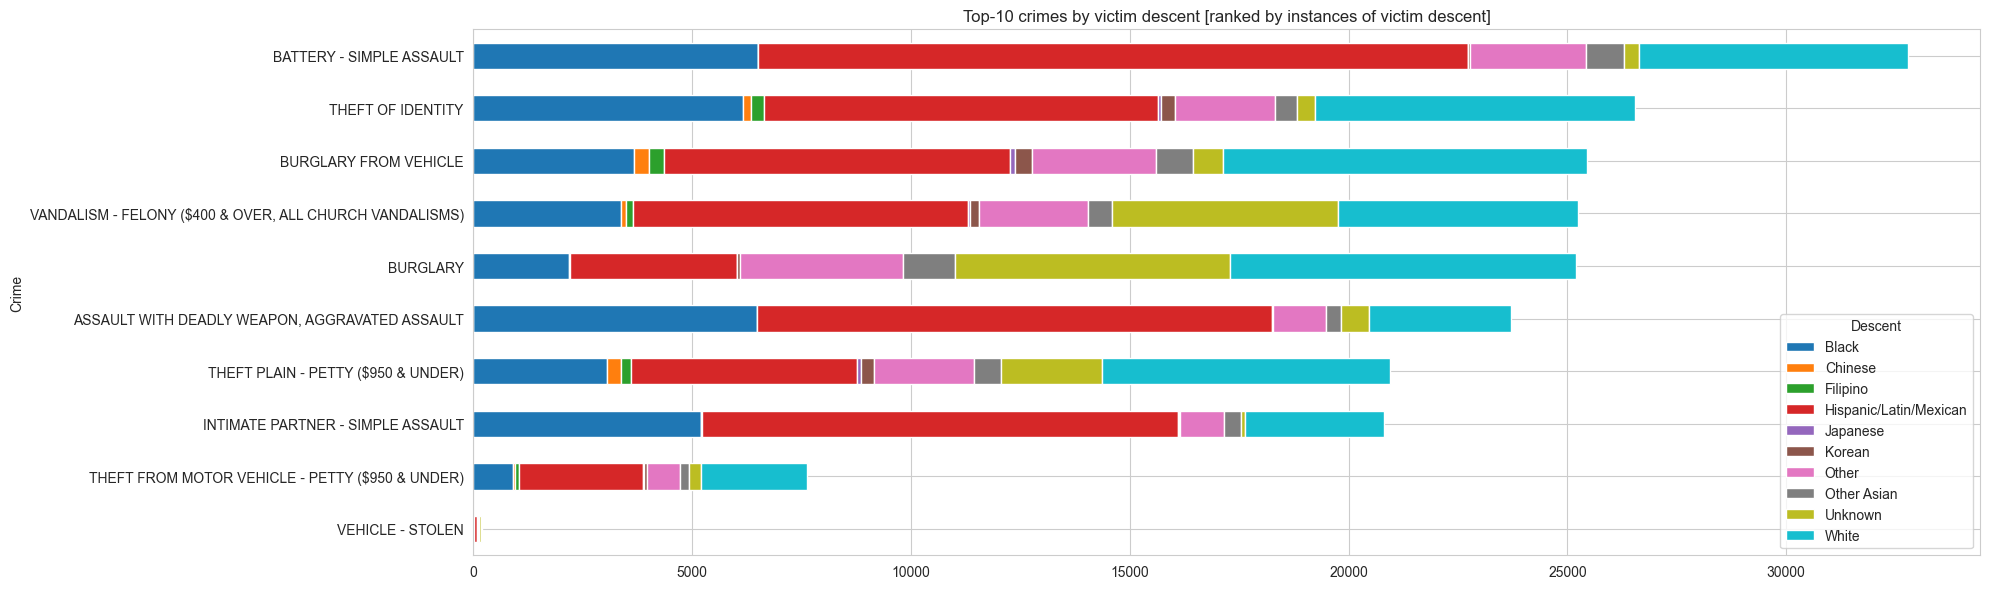

In [179]:
descents = df['Vict Descent'].value_counts()[:10].index
tmp = df[(df['Crm Cd Desc'].isin(top_crimes)) & (df['Vict Descent'].isin(descents))]
tmp = tmp.groupby(['Crm Cd Desc','Vict Descent'])['DR_NO'].count().reset_index()
tmp['Vict Descent'] = tmp['Vict Descent'].map(mapping_descent)
tmp.columns = ['Crime', 'Descent', 'Count']


tmp = tmp.pivot(index = 'Crime', columns = 'Descent', values = 'Count')
tmp['Total'] = tmp.sum(axis = 1)
tmp = tmp.sort_values(by = 'Total')
tmp = tmp.drop("Total", axis = 1)

tmp.plot(kind = 'barh', stacked = True, figsize = (20, 6))
plt.title(f"Top-{top} crimes by victim descent [ranked by instances of victim descent]")
plt.tight_layout()

# Q2. How frequent are the major crimes?

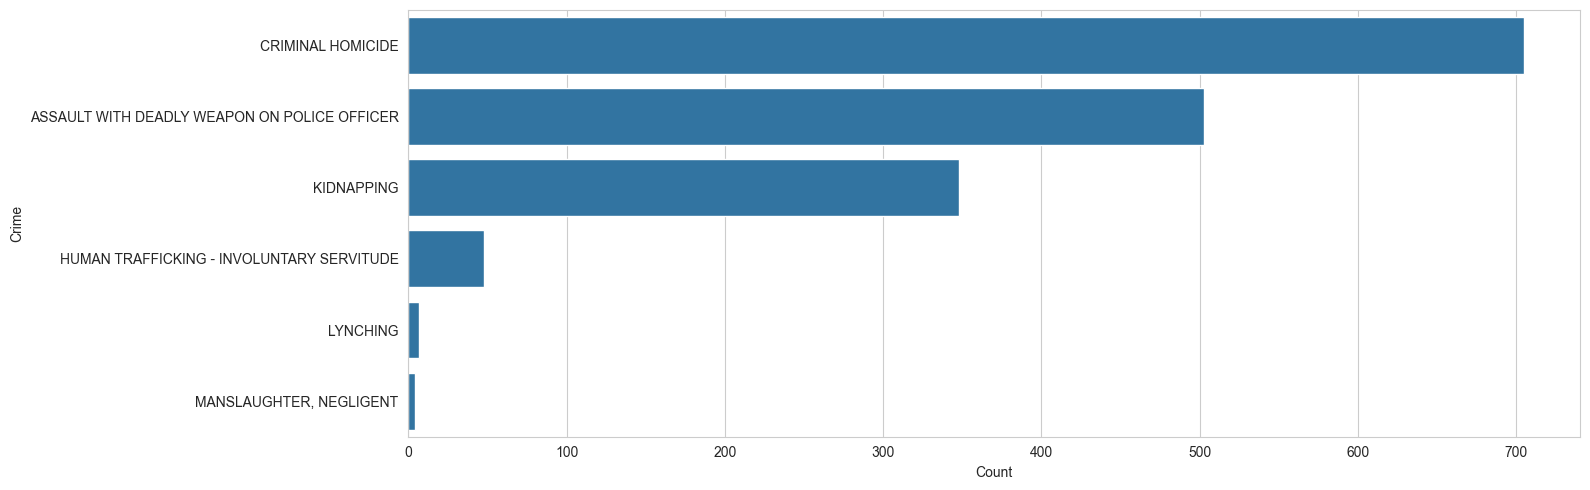

In [180]:
tmp = df[df['Crm Cd Desc'].isin(major_crimes)]
tmp = tmp.groupby("Crm Cd Desc")['DR_NO'].count().reset_index()
tmp.columns = ['Crime', 'Count']
tmp = tmp.sort_values(by = 'Count', ascending = False)

plt.figure(figsize = (16, 5))
sns.barplot(data = tmp, x = 'Count', y = 'Crime')
plt.tight_layout()

## Among Major Crimes

### How does gender vary?

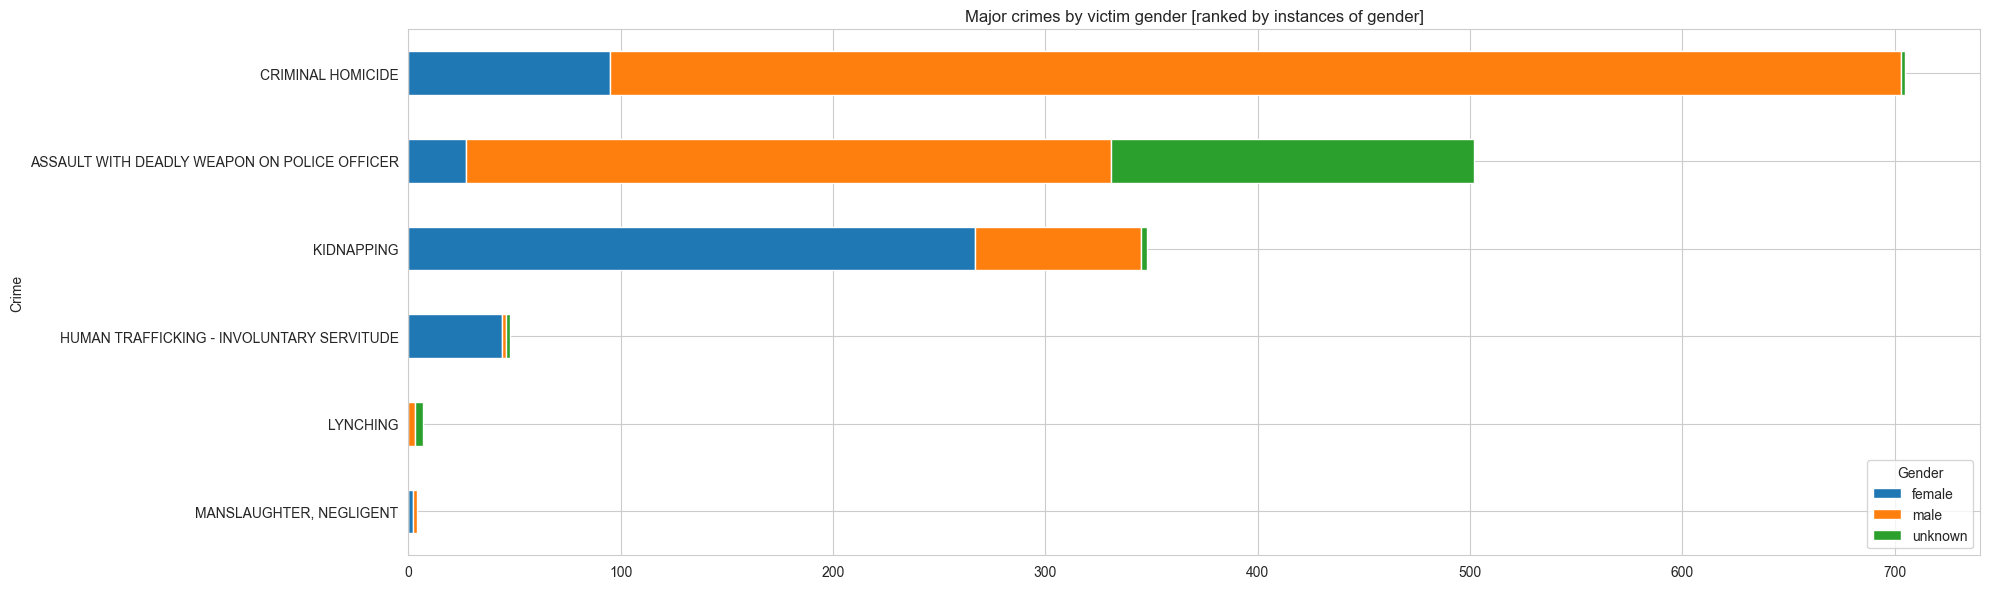

In [181]:
tmp = df[df['Crm Cd Desc'].isin(major_crimes)]
tmp = tmp.groupby(['Crm Cd Desc','Vict Sex'])['DR_NO'].count().reset_index()
tmp.columns = ['Crime', 'Gender', 'Count']
tmp = tmp.pivot(index = 'Crime', columns = 'Gender', values = 'Count')
tmp['Total'] = tmp.sum(axis = 1)
tmp = tmp.sort_values(by = 'Total')
tmp = tmp.drop("Total", axis = 1)

tmp.plot(kind = 'barh', stacked = True, figsize = (20, 6))
plt.title(f"Major crimes by victim gender [ranked by instances of gender]")
plt.tight_layout()

### How does victim descent vary?

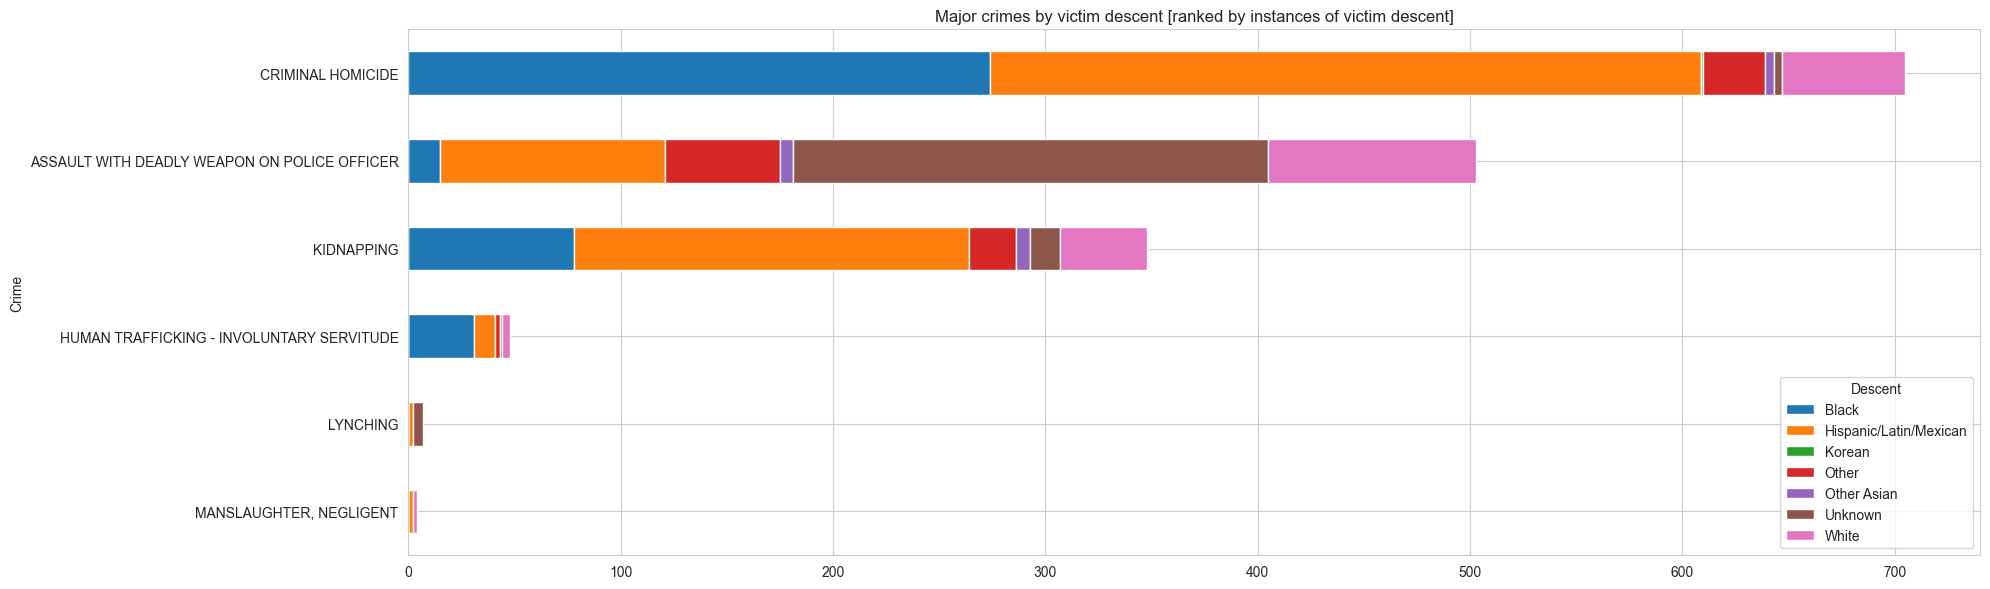

In [182]:
descents = df['Vict Descent'].value_counts()[:10].index
tmp = df[(df['Crm Cd Desc'].isin(major_crimes)) & (df['Vict Descent'].isin(descents))]
tmp = tmp.groupby(['Crm Cd Desc','Vict Descent'])['DR_NO'].count().reset_index()
tmp['Vict Descent'] = tmp['Vict Descent'].map(mapping_descent)

tmp.columns = ['Crime', 'Descent', 'Count']
tmp = tmp.pivot(index = 'Crime', columns = 'Descent', values = 'Count')
tmp['Total'] = tmp.sum(axis = 1)
tmp = tmp.sort_values(by = 'Total')
tmp = tmp.drop("Total", axis = 1)

tmp.plot(kind = 'barh', stacked = True, figsize = (20, 6))
plt.title(f"Major crimes by victim descent [ranked by instances of victim descent]")
plt.tight_layout()

# Q3. How does total crime vary by age, gender and victim descent?

In [183]:
def plot_crimes_by(df, var, ax):
    mapped_val = mapping[var]
    tmp = df.groupby(var)['DR_NO'].count().reset_index()
    tmp.columns = [mapped_val, 'Count']
    tmp = tmp.sort_values(by = 'Count', ascending = False)
    tmp['Count'] = tmp['Count'] / tmp['Count'].sum()
    
    if var == 'Vict Descent':
        tmp[mapped_val] = tmp[mapped_val].map(mapping_descent)
        data = []
        for i, row in tmp.iterrows():
            if row['Count'] < 0.05:
                if row[mapped_val] in ['Korean', 'Filipino', 'Chinese', 'Japanese', 'Vietnamese', 'Asian Indian', 'Laotian', 'Cambodian']:
                    data.append('Other Asian')
                elif row[mapped_val] in ['American Indian', 'Pacific Islander', 'Hawaiian', 'Guamanian', 'Samoan']:
                    data.append('Other')
                else:
                    data.append(row[mapped_val])
            else:
                data.append(row[mapped_val])
        tmp[mapped_val] = np.array(data)
        tmp = tmp.groupby(mapped_val)['Count'].sum().reset_index().sort_values(by = 'Count', ascending = False)
    
    if var == 'Vict Agebin':
        tmp = tmp[tmp['Victim Age'] != 'nan']

    sns.barplot(data = tmp, y = mapped_val, x = 'Count', ax = ax)
    plt.xticks(rotation = 90)

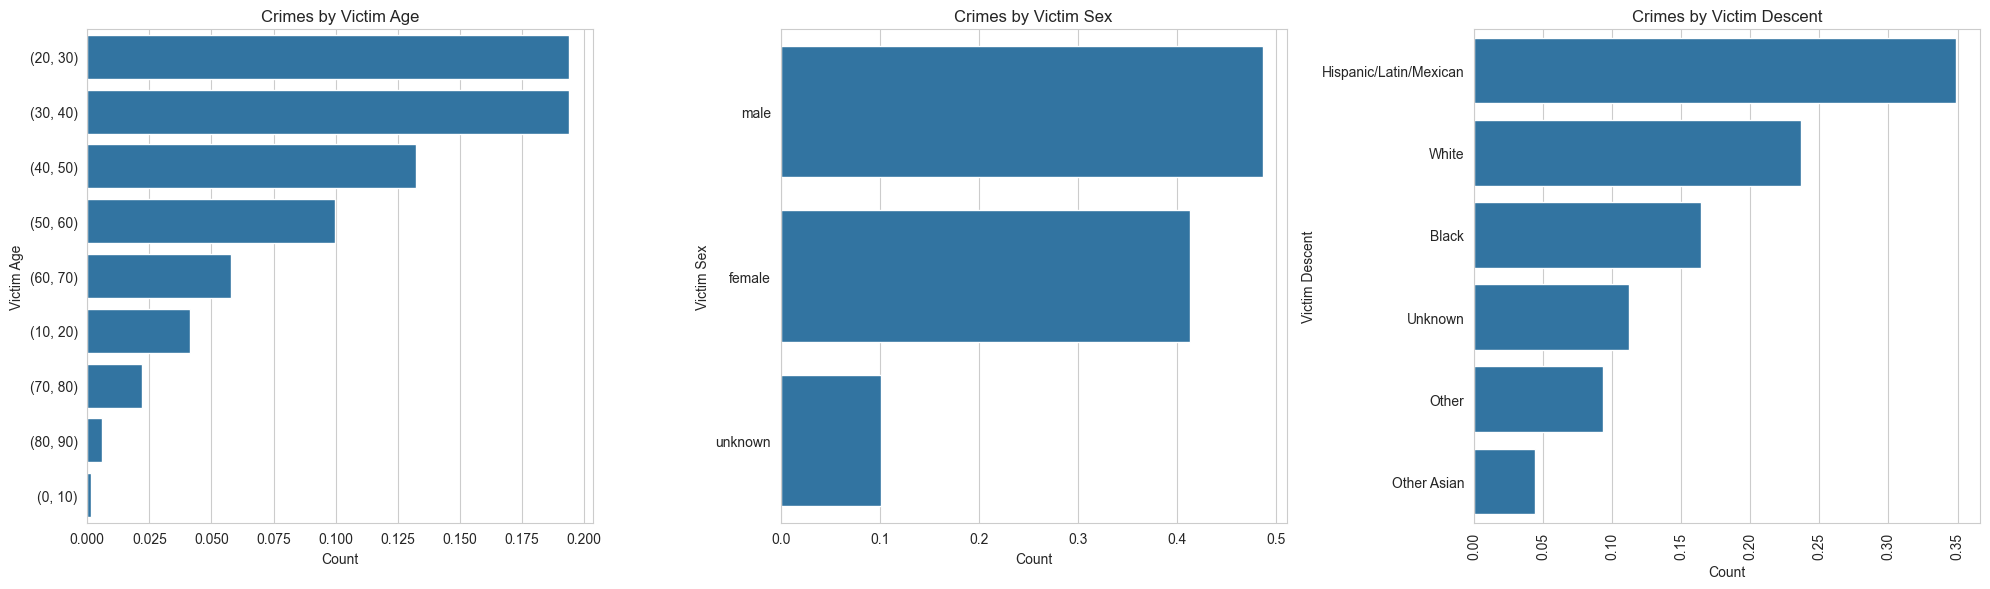

In [184]:
n_rows = 1
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (20, 6))
axs = axs.flatten()

items = ['Vict Agebin', 'Vict Sex', 'Vict Descent']

i = 0
for var in items:
    plot_crimes_by(df, var, axs[i])
    axs[i].set_title(f"Crimes by {mapping[var]}")
    i += 1
plt.tight_layout()

## Q3.1 What is the distribution by age of crime victims?

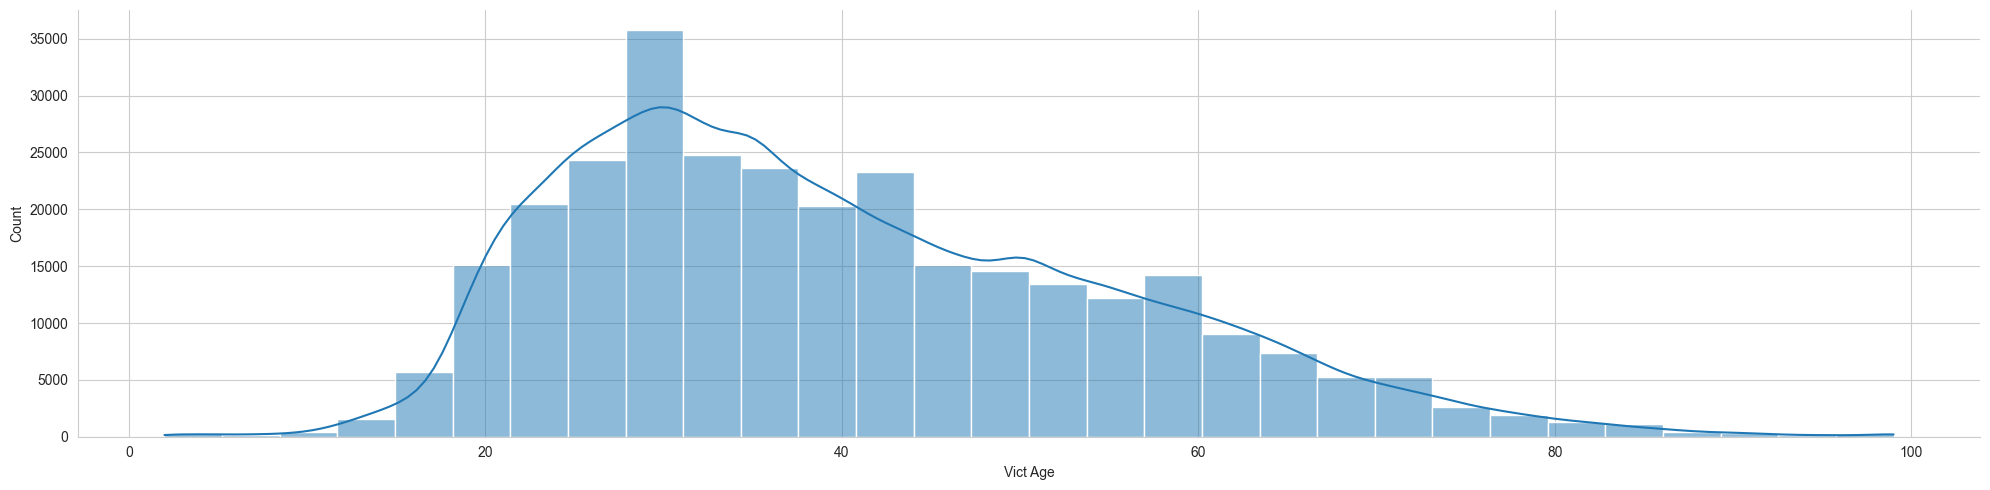

In [185]:
sns.displot(data=df, x = 'Vict Age', aspect = 4, kde = True, bins = 30)
plt.tight_layout()

## Q4. How does Crime vary by time of day, month, and year?

### Analysis including 2023

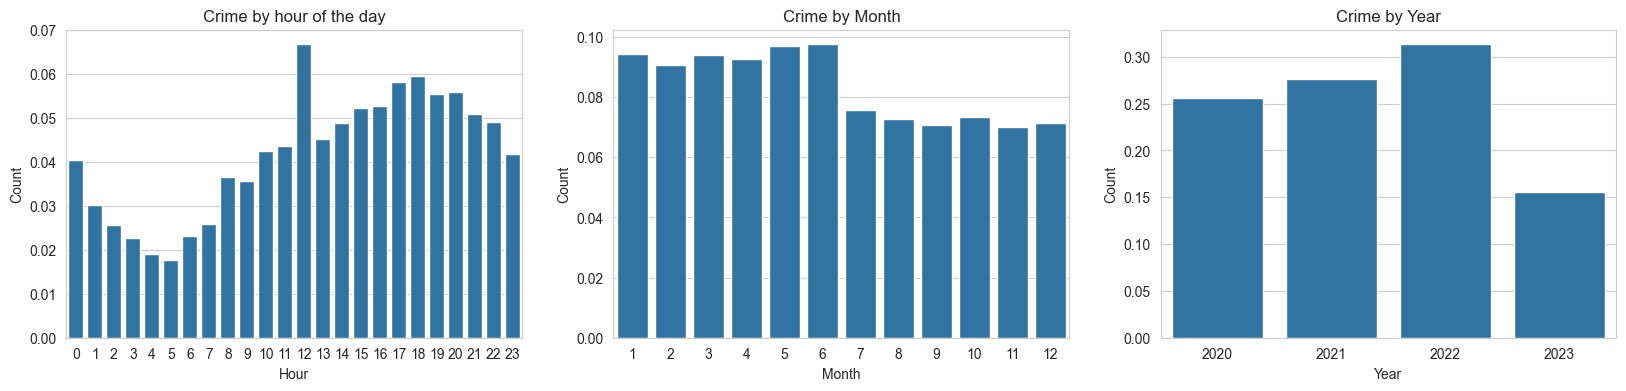

In [186]:
fig, axs = plt.subplots(1, 3, figsize = (20, 4))

# By Hour
tmp = df.groupby('Hour')['DR_NO'].count().reset_index()
tmp.columns = ['Hour', 'Count']
tmp['Count'] = tmp['Count'] / tmp['Count'].sum()

sns.barplot(data = tmp, x = 'Hour', y = 'Count', ax=axs[0])
axs[0].set_title('Crime by hour of the day');

# By Month
tmp = df.groupby('Month')['DR_NO'].count().reset_index()
tmp.columns = ['Month', 'Count']
tmp['Count'] = tmp['Count'] / tmp['Count'].sum()

sns.barplot(data = tmp, x = 'Month', y = 'Count', ax=axs[1])
axs[1].set_title('Crime by Month');

# By Year
tmp = df.groupby('Year')['DR_NO'].count().reset_index()
tmp.columns = ['Year', 'Count']
tmp['Count'] = tmp['Count'] / tmp['Count'].sum()

sns.barplot(data = tmp, x = 'Year', y = 'Count', ax=axs[2])
axs[2].set_title('Crime by Year');

### Analysis excluding 2023

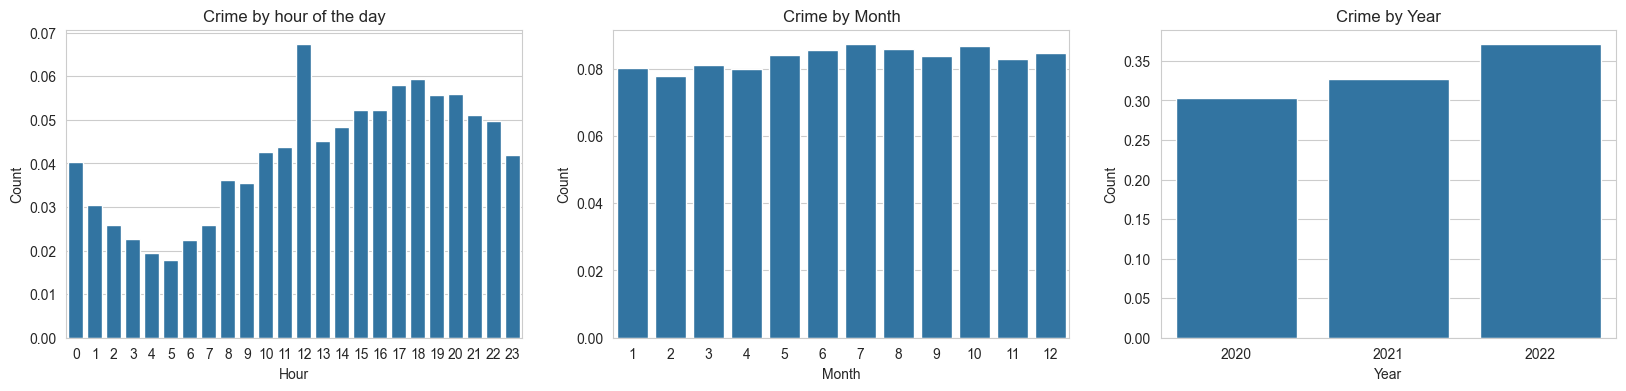

In [187]:
df1 = df[df['Year'] < 2023]

fig, axs = plt.subplots(1, 3, figsize = (20, 4))

# By Hour
tmp = df1.groupby('Hour')['DR_NO'].count().reset_index()
tmp.columns = ['Hour', 'Count']
tmp['Count'] = tmp['Count'] / tmp['Count'].sum()

sns.barplot(data = tmp, x = 'Hour', y = 'Count', ax=axs[0])
axs[0].set_title('Crime by hour of the day');

# By Month
tmp = df1.groupby('Month')['DR_NO'].count().reset_index()
tmp.columns = ['Month', 'Count']
tmp['Count'] = tmp['Count'] / tmp['Count'].sum()

sns.barplot(data = tmp, x = 'Month', y = 'Count', ax=axs[1])
axs[1].set_title('Crime by Month');

# By Year
tmp = df1.groupby('Year')['DR_NO'].count().reset_index()
tmp.columns = ['Year', 'Count']
tmp['Count'] = tmp['Count'] / tmp['Count'].sum()

sns.barplot(data = tmp, x = 'Year', y = 'Count', ax=axs[2])
axs[2].set_title('Crime by Year');

### How does crime vary by Hour and Month for each year (ex. 2023)?

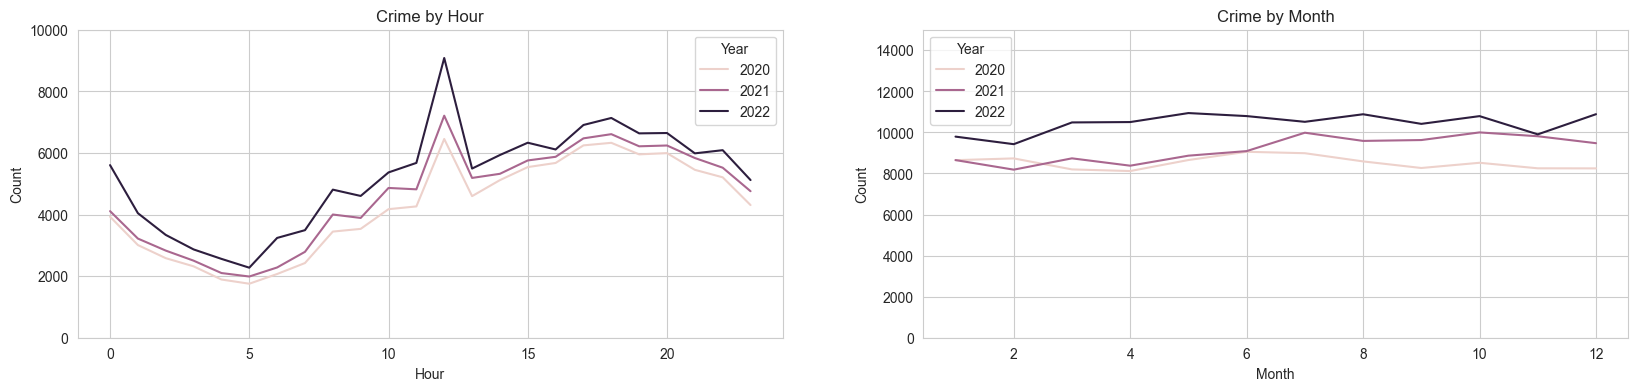

In [188]:
tmp1 = df1.groupby(['Year','Hour'])['DR_NO'].count().reset_index()
tmp1.columns = ['Year','Hour','Count']

tmp2 = df1.groupby(['Year','Month'])['DR_NO'].count().reset_index()
tmp2.columns = ['Year','Month','Count']

fig, axs = plt.subplots(1, 2, figsize = (20, 4))

sns.lineplot(data = tmp1, x = 'Hour', y = 'Count', hue = 'Year', ax=axs[0])
axs[0].set_ylim(0, 10000)
axs[0].set_title('Crime by Hour');

sns.lineplot(data = tmp2, x = 'Month', y = 'Count', hue = 'Year', ax=axs[1])
axs[1].set_ylim(0, 15000)
axs[1].set_title('Crime by Month');


### Remove THEFT OF IDENTITY

Identity theft was not reported regularly in the dataset, disproportionately reported at midday

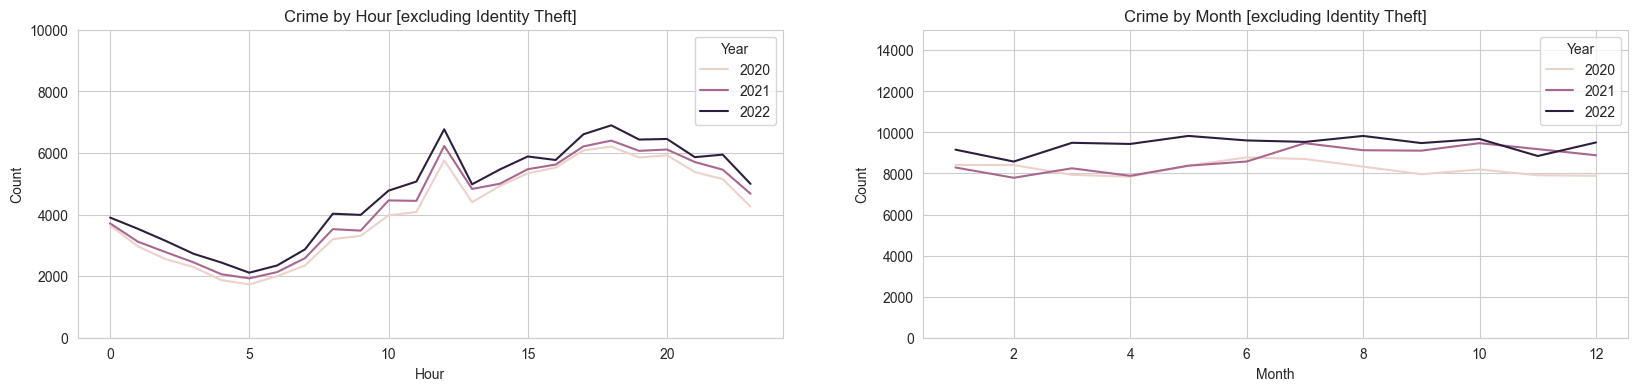

In [189]:
tmp = df[(df['Crm Cd Desc'] != "THEFT OF IDENTITY") & (df['Year'] < 2023)]

tmp1 = tmp.groupby(['Year','Hour'])['DR_NO'].count().reset_index()
tmp1.columns = ['Year','Hour','Count']

tmp2 = tmp.groupby(['Year','Month'])['DR_NO'].count().reset_index()
tmp2.columns = ['Year','Month','Count']

fig, axs = plt.subplots(1, 2, figsize = (20, 4))

sns.lineplot(data = tmp1, x = 'Hour', y = 'Count', hue = 'Year', ax=axs[0])
axs[0].set_ylim(0, 10000)
axs[0].set_title('Crime by Hour [excluding Identity Theft]');

sns.lineplot(data = tmp2, x = 'Month', y = 'Count', hue = 'Year', ax=axs[1])
axs[1].set_ylim(0, 15000)
axs[1].set_title('Crime by Month [excluding Identity Theft]');

## When do the most frequent crimes occur?

### By Time of Day

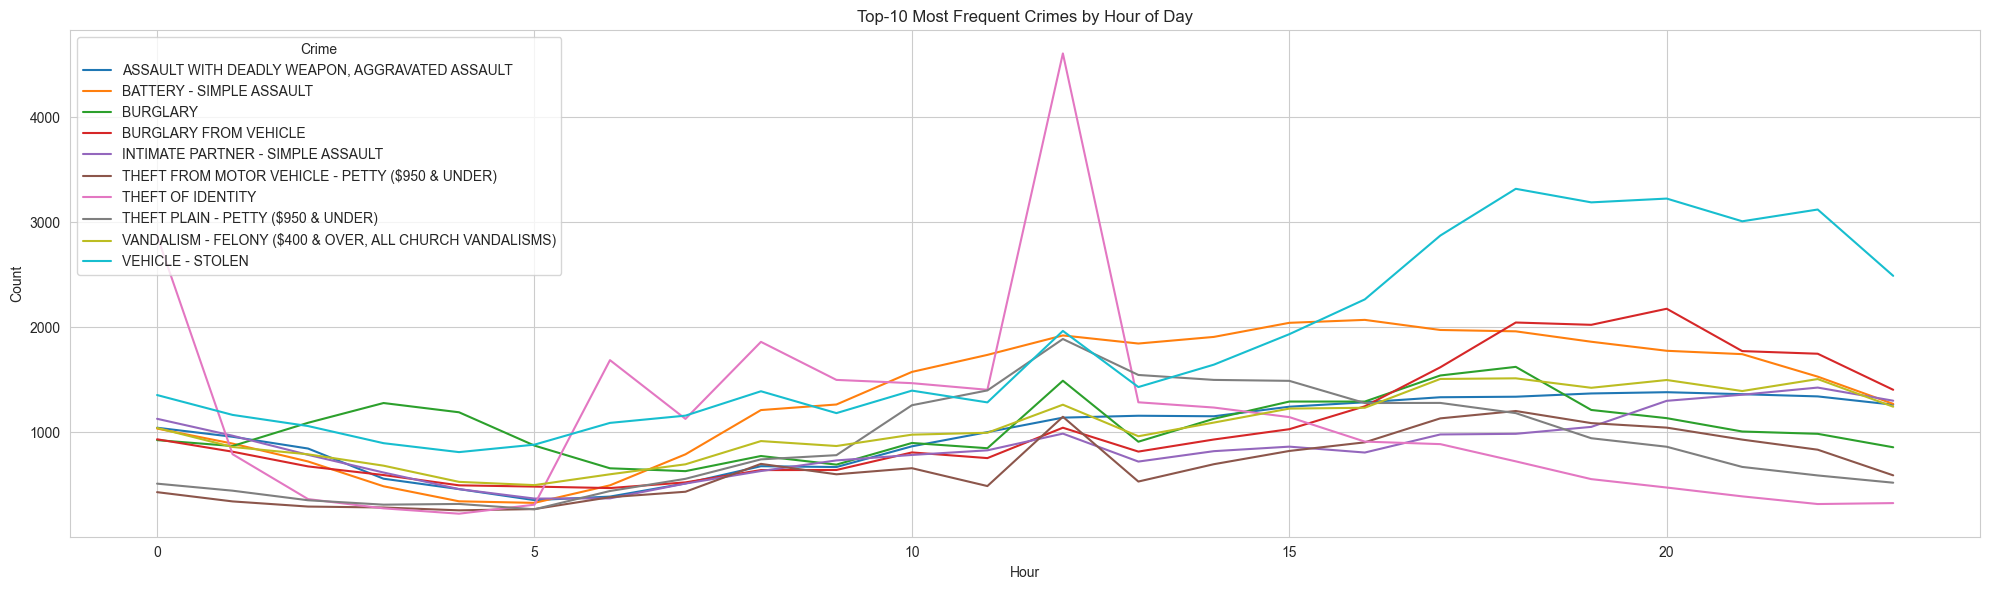

In [190]:
tmp = df[df['Crm Cd Desc'].isin(top_crimes)]

tmp = tmp.groupby(['Crm Cd Desc', 'Hour'])['DR_NO'].count().reset_index()
tmp.columns = ['Crime', 'Hour', 'Count']
plt.figure(figsize = (20, 6))
sns.lineplot(data = tmp, x = 'Hour', y = 'Count', hue = 'Crime')
plt.title(f"Top-{top} Most Frequent Crimes by Hour of Day")
plt.tight_layout()

### By Month of the Year (2020 - 2022)

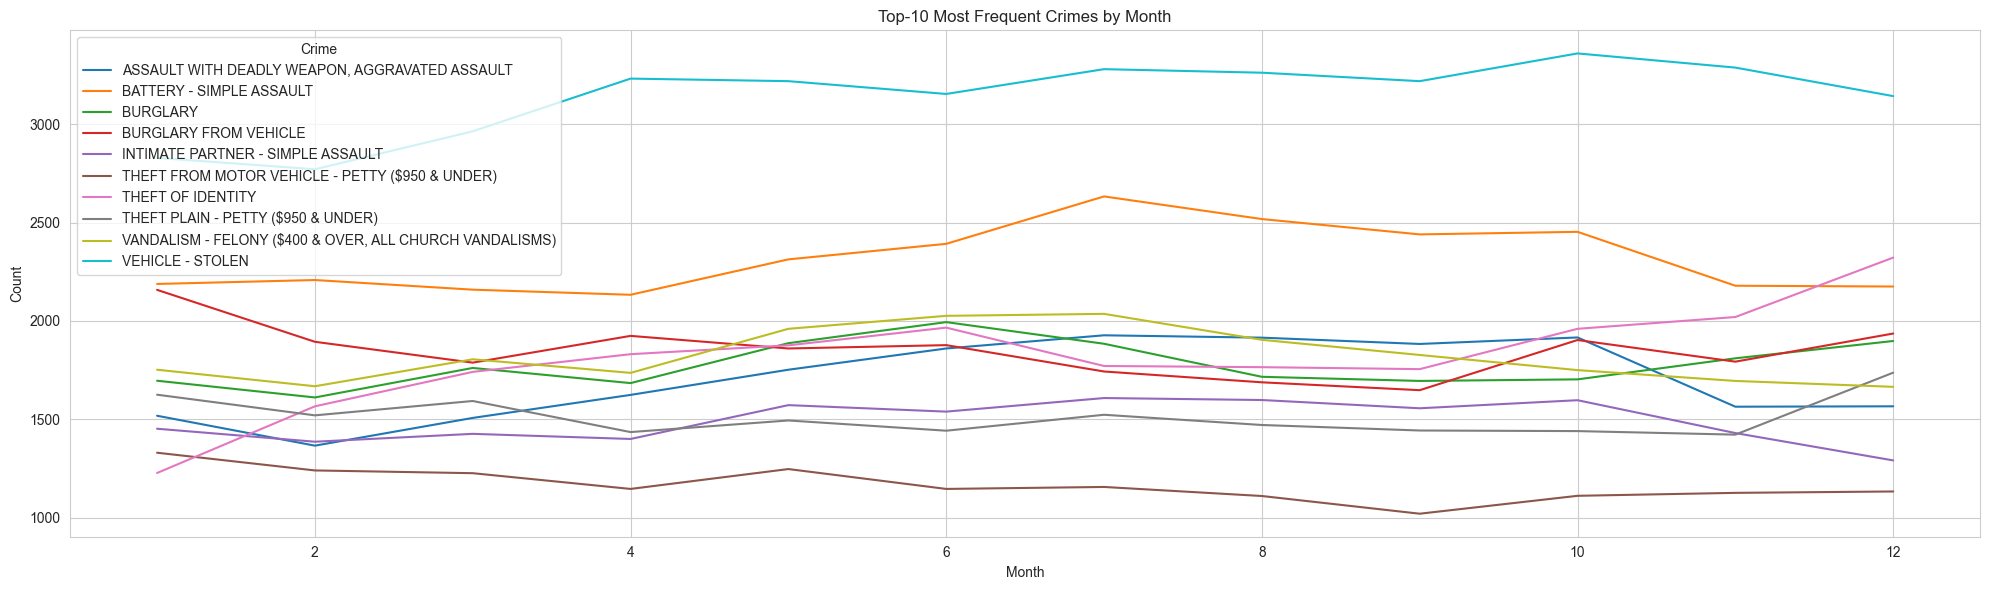

In [191]:
tmp = df[(df['Crm Cd Desc'].isin(top_crimes)) & (df['Year'] < 2023)]
tmp = tmp.groupby(['Crm Cd Desc', 'Month'])['DR_NO'].count().reset_index()
tmp.columns = ['Crime', 'Month', 'Count']

plt.figure(figsize = (20, 6))
sns.lineplot(data = tmp, x = 'Month', y = 'Count', hue = 'Crime')
plt.title(f"Top-{top} Most Frequent Crimes by Month")
plt.tight_layout()

## By Historic Trend

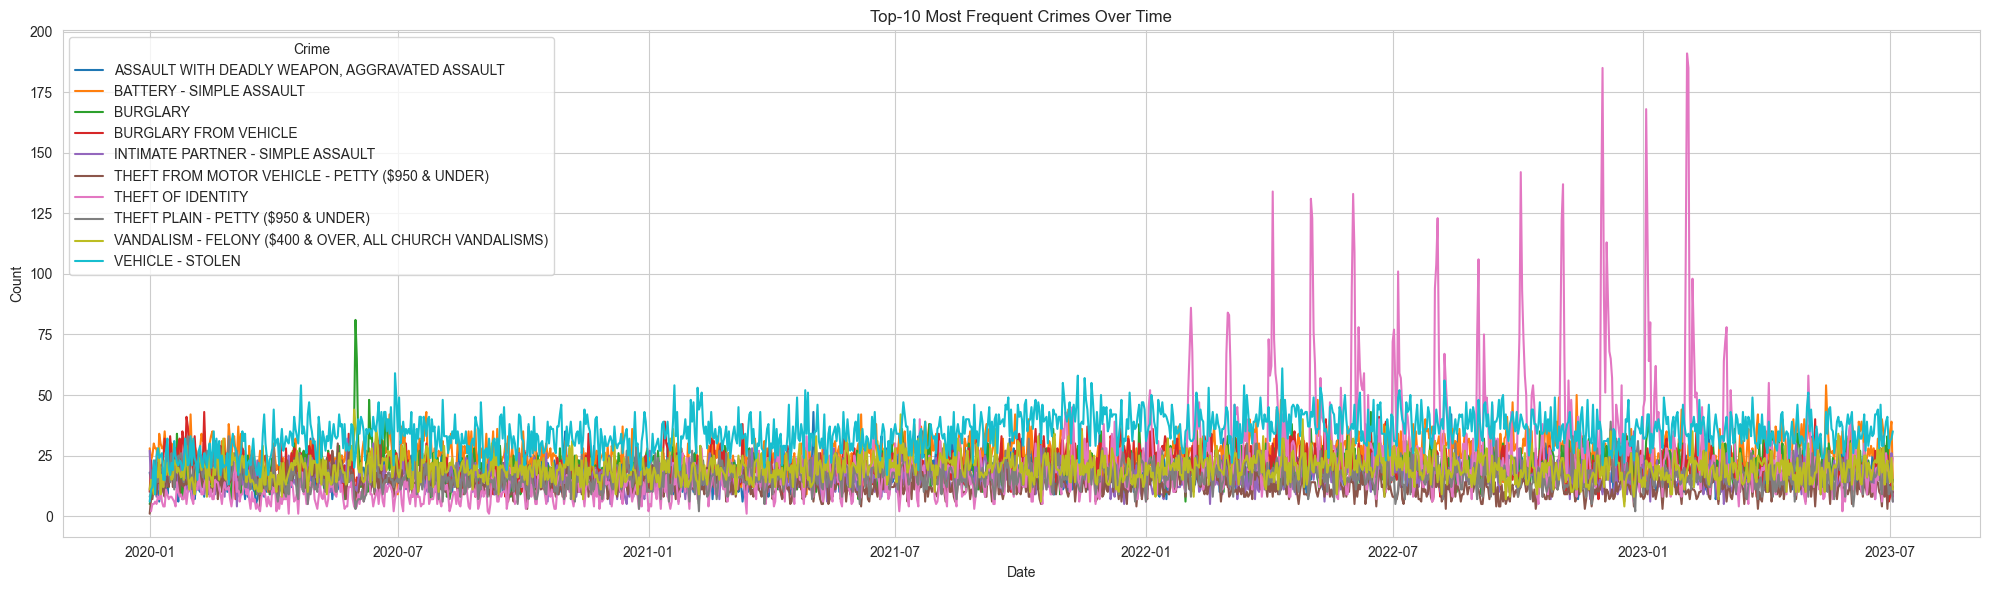

In [192]:
tmp = df[(df['Crm Cd Desc'].isin(top_crimes))]
tmp = tmp.groupby(['Crm Cd Desc', 'Date Rptd'])['DR_NO'].count().reset_index()
tmp.columns = ['Crime', 'Date', 'Count']

plt.figure(figsize = (20, 6))
sns.lineplot(data = tmp, x = 'Date', y = 'Count', hue = 'Crime')
plt.title(f"Top-{top} Most Frequent Crimes Over Time")
plt.tight_layout()

## Top Crimes MA

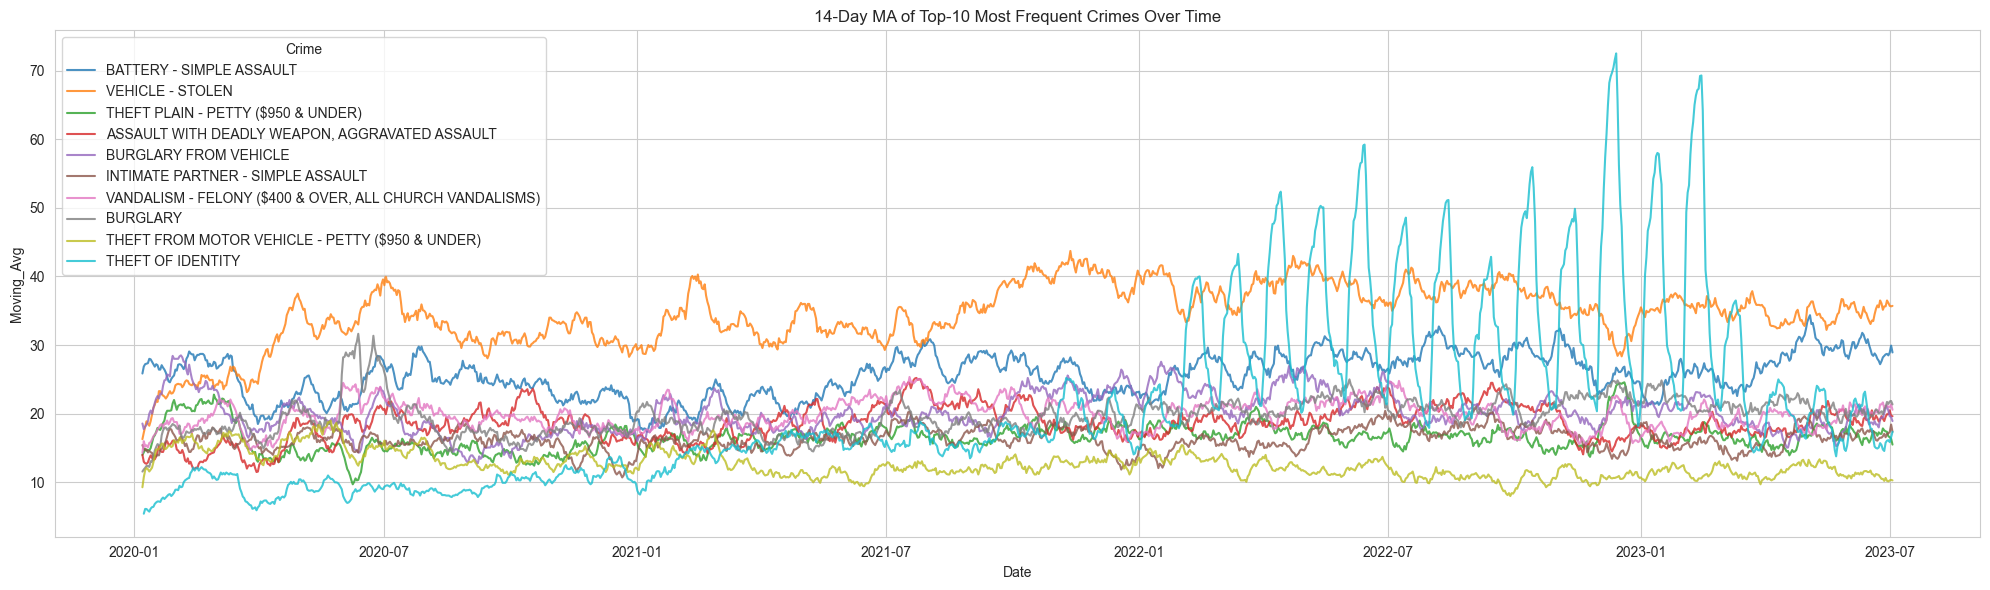

In [193]:
moving_avg_val = 14

tmp = df[(df['Crm Cd Desc'].isin(top_crimes))]
tmp = tmp.groupby(['Crm Cd Desc', 'Date Rptd'])['DR_NO'].count().reset_index()
tmp.columns = ['Crime', 'Date', 'Count']
tmp = tmp.sort_values(by = "Date")

tmp['Moving_Avg'] = tmp.groupby('Crime')['Count'].transform(lambda x: x.rolling(window = moving_avg_val, min_periods = 7).mean())
tmp = tmp.dropna()

plt.figure(figsize = (20, 6))
sns.lineplot(data = tmp, x = 'Date', y = 'Moving_Avg', hue = 'Crime', alpha = 0.8)
plt.title(f"{moving_avg_val}-Day MA of Top-{top} Most Frequent Crimes Over Time")
plt.tight_layout()

## Major Crimes MA

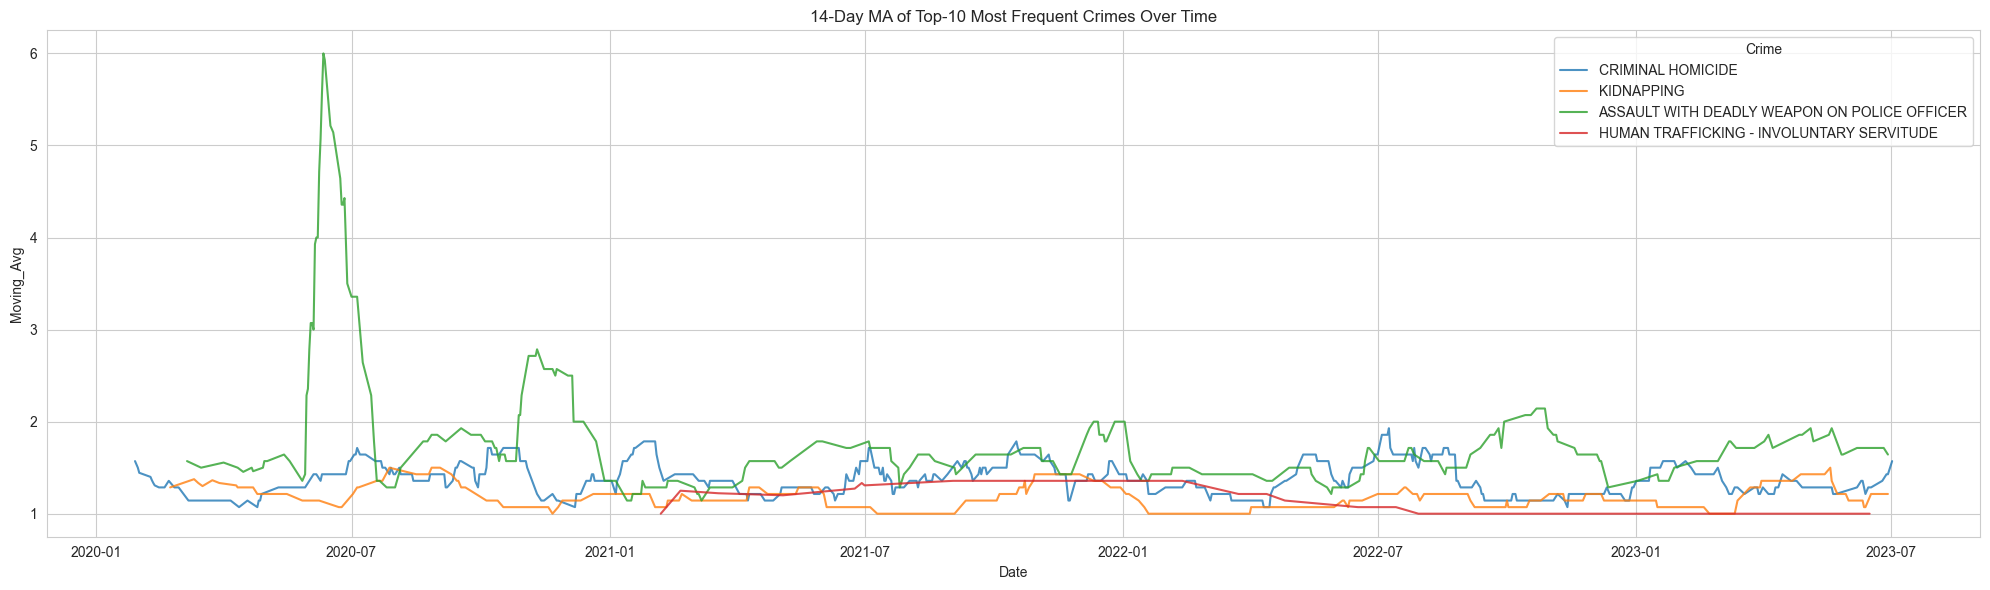

In [194]:
tmp = df[(df['Crm Cd Desc'].isin(major_crimes))]
tmp = tmp.groupby(['Crm Cd Desc', 'Date Rptd'])['DR_NO'].count().reset_index()
tmp.columns = ['Crime', 'Date', 'Count']
tmp = tmp.sort_values(by = "Date")

tmp['Moving_Avg'] = tmp.groupby('Crime')['Count'].transform(lambda x: x.rolling(window = moving_avg_val, min_periods = 7).mean())
tmp = tmp.dropna()

plt.figure(figsize = (20, 6))
sns.lineplot(data = tmp, x = 'Date', y = 'Moving_Avg', hue = 'Crime', alpha = 0.8)
plt.title(f"{moving_avg_val}-Day MA of Top-{top} Most Frequent Crimes Over Time")
plt.tight_layout()

# Q6. Where?

## Q6.1 Do crimes most frequently occur?

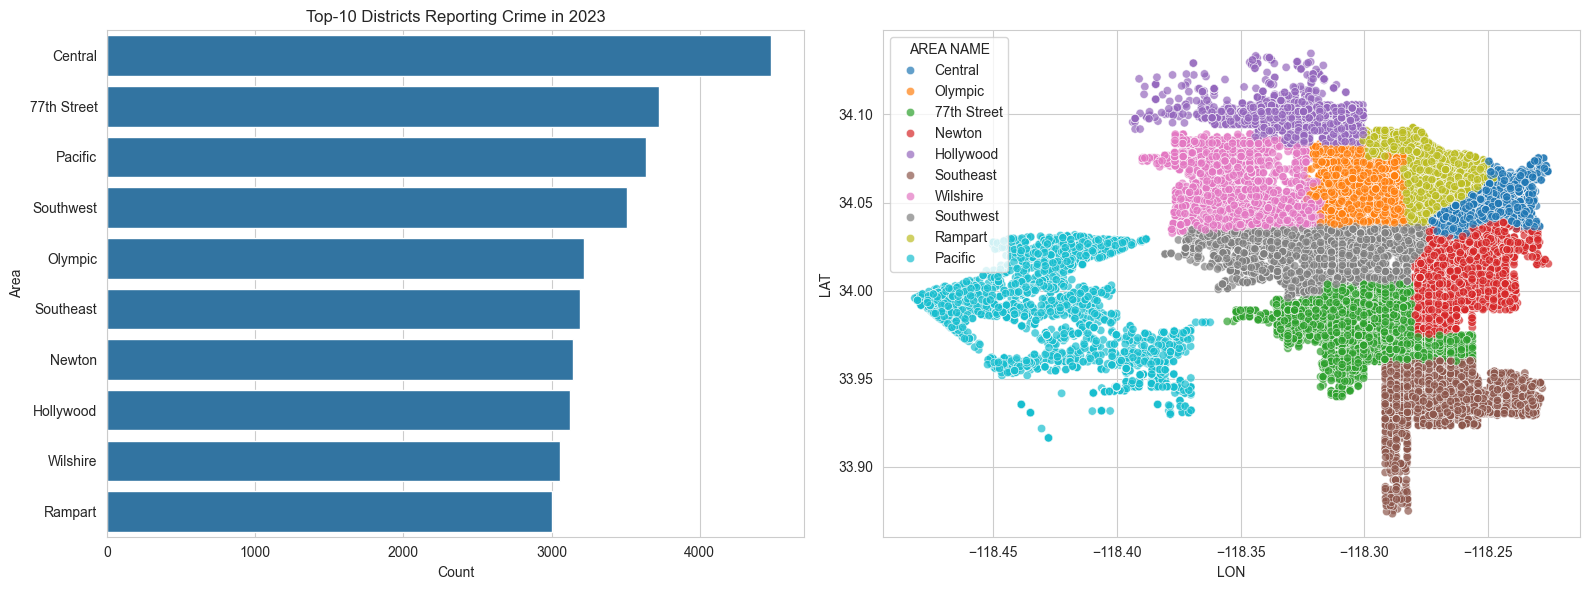

In [210]:
fig, axs = plt.subplots(1, 2, figsize = (16, 6))

year = 2023
tmp = df[df['Year'] == year]
tmp1 = tmp.groupby("AREA NAME")['DR_NO'].count().sort_values(ascending = False).reset_index()[:top_dist_limit]
tmp1.columns = ['Area', 'Count']

tmp = tmp[tmp['AREA NAME'].isin(tmp1['Area'].values)]
sns.barplot(data = tmp1, x = 'Count', y = 'Area', ax = axs[0])
sns.scatterplot(data = tmp, x = 'LON', y = 'LAT', ax = axs[1], hue = 'AREA NAME', alpha = 0.7)

axs[0].set_title(f"Top-{top_dist_limit} Districts Reporting Crime in {2023}")

plt.tight_layout()

## Q6.2 Do the top-crimes most frequently occur?

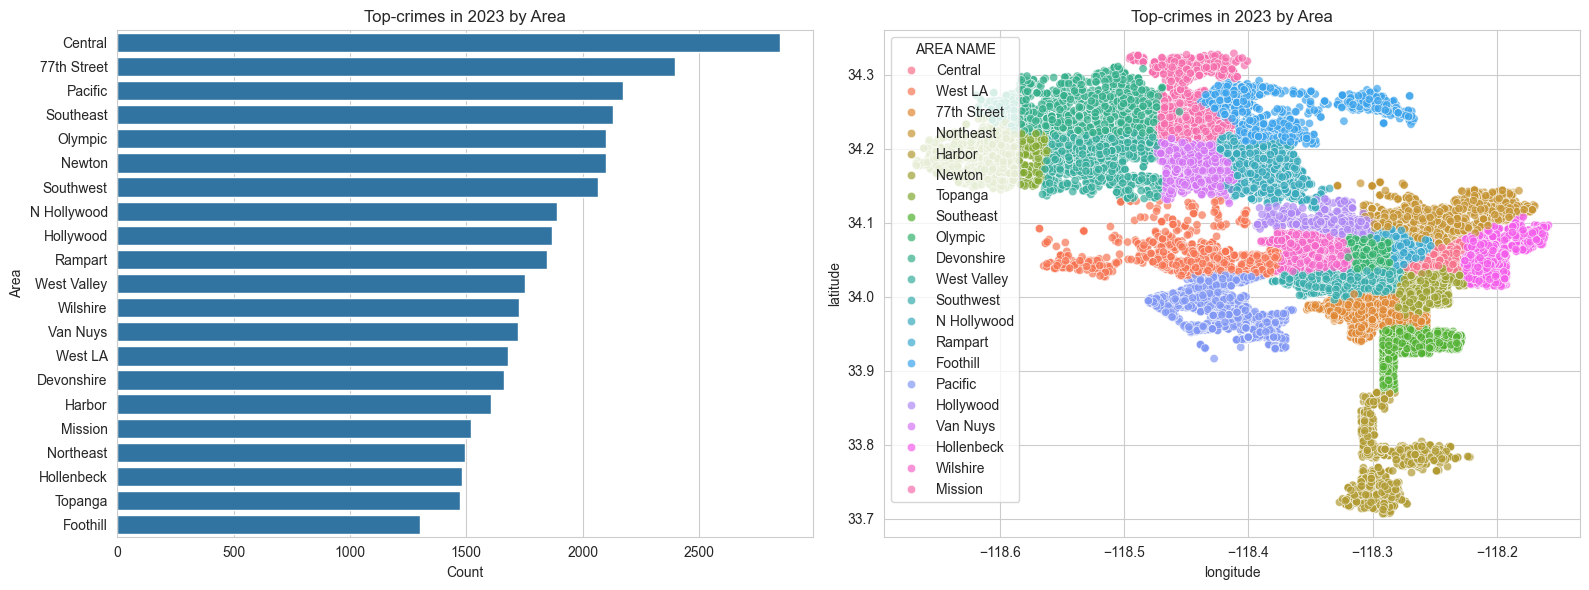

In [200]:
fig, axs = plt.subplots(1, 2, figsize = (16, 6))

year = 2023

tmp = df[(df['Crm Cd Desc'].isin(top_crimes)) & (df['Year'] == year)]
tmp1 = tmp.groupby("AREA NAME")['DR_NO'].count().sort_values(ascending = False).reset_index()
tmp1.columns = ['Area', 'Count']
sns.barplot(data = tmp1, x = 'Count', y = 'Area', ax = axs[0])
sns.scatterplot(data = tmp, x = 'LON', y = 'LAT', ax = axs[1], hue = 'AREA NAME', alpha = 0.7)

axs[0].set_title(f"Top-crimes in {year} by Area")
axs[1].set_title(f"Top-crimes in {year} by Area")
axs[1].set_xlabel("longitude")
axs[1].set_ylabel("latitude")

plt.tight_layout()

## Q6.3 Do the major crimes most frequently occur?

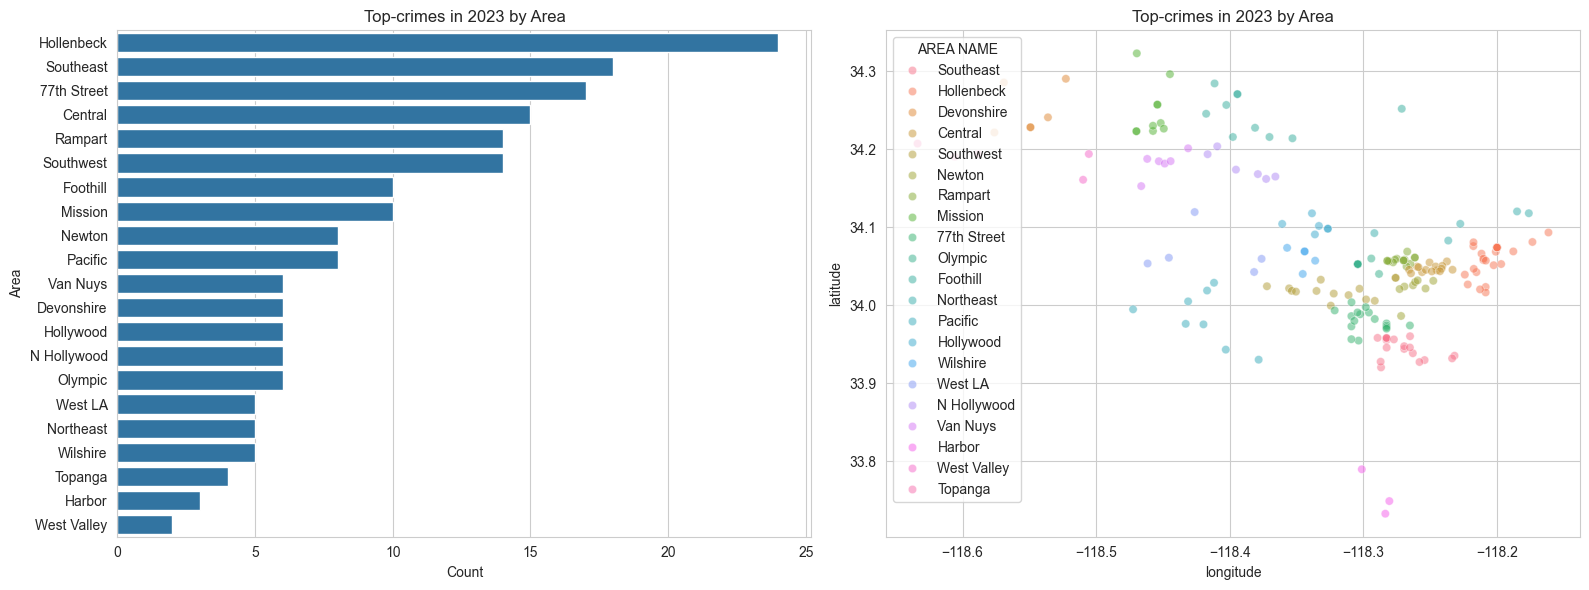

In [211]:
fig, axs = plt.subplots(1, 2, figsize = (16, 6))

year = 2023

tmp = df[(df['Crm Cd Desc'].isin(major_crimes)) & (df['Year'] == year)]
tmp1 = tmp.groupby("AREA NAME")['DR_NO'].count().sort_values(ascending = False).reset_index()
tmp1.columns= ['Area', 'Count']

sns.barplot(data = tmp1, x = 'Count', y = 'Area', ax = axs[0])
sns.scatterplot(data = tmp, x = 'LON', y = 'LAT', ax = axs[1], hue = 'AREA NAME', alpha = 0.5)

axs[0].set_title(f"Top-crimes in {year} by Area")
axs[1].set_title(f"Top-crimes in {year} by Area")
axs[1].set_xlabel("longitude")
axs[1].set_ylabel("latitude")

plt.tight_layout()

# Prediction Models

## Model predicting when a crime may occur

In [212]:
#  TBD at later date